In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import svm
%matplotlib inline
from scipy.stats import mstats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree


# Data Cleaning


In [3]:
df=pd.read_csv("Loan_Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
percentage_missing = (missing_values / len(df)) * 100

# Print the percentage of missing values for each column
print(percentage_missing)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.Gender.fillna(df.Gender.mode()[0],inplace = True)

In [8]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [9]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [10]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df["Dependents"].replace('3+','3',inplace=True)

In [12]:
df.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [13]:
df.Dependents.fillna(df.Dependents.median(),inplace = True)

In [14]:
df.LoanAmount.fillna(df.LoanAmount.median(),inplace = True)

In [15]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(),inplace = True)

In [18]:
df.Credit_History.fillna(df.Credit_History.median(),inplace = True)

In [19]:
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
df.duplicated().sum()

0

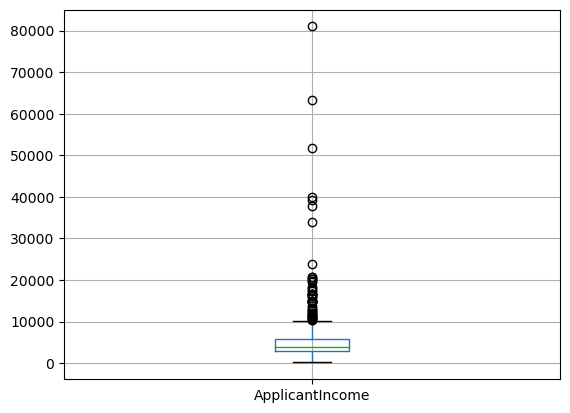

In [23]:
df.boxplot(column=['ApplicantIncome'])
plt.show()

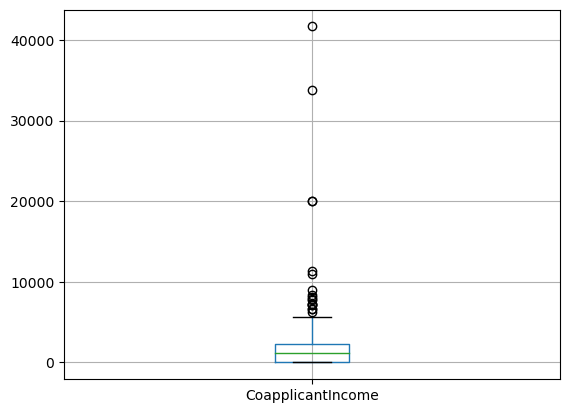

In [24]:
df.boxplot(column=['CoapplicantIncome'])
plt.show()

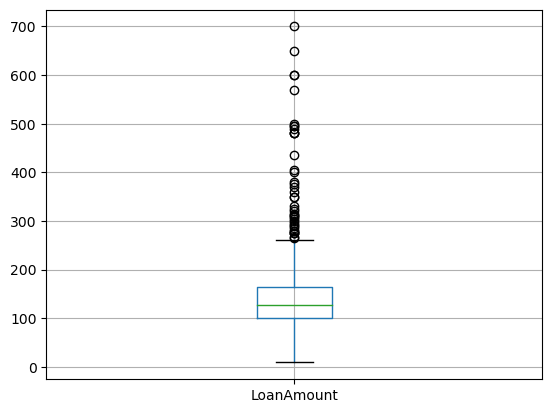

In [25]:
df.boxplot(column=['LoanAmount'])
plt.show()

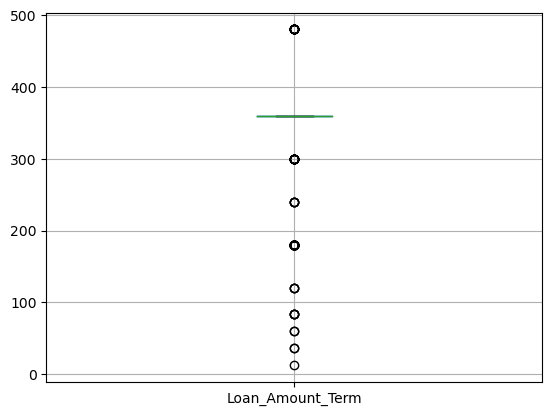

In [26]:
df.boxplot(column=['Loan_Amount_Term'])
plt.show()

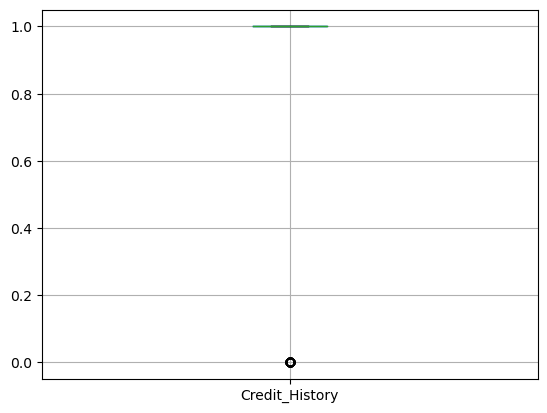

In [27]:
df.boxplot(column=['Credit_History'])
plt.show()

In [28]:
df["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [29]:
columns_to_handle = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply Winsorization to handle outliers for each column
for column in columns_to_handle:
    win_data = mstats.winsorize(df[column], limits=[0.09, 0.09])
    df[column] = win_data

# Print the updated DataFrame
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        70.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

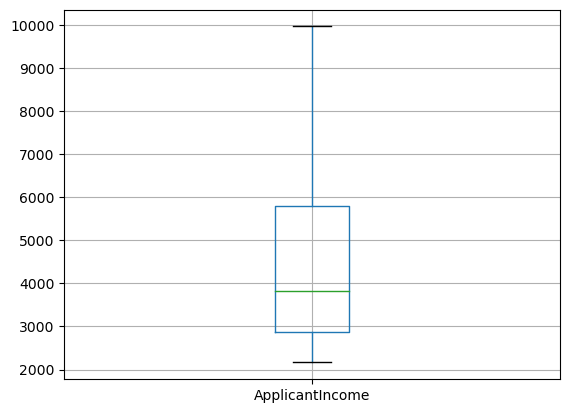

In [30]:
df.boxplot(column=['ApplicantIncome'])
plt.show()

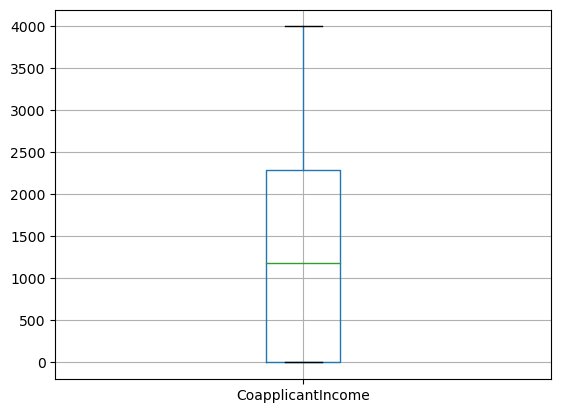

In [31]:


df.boxplot(column=['CoapplicantIncome'])
plt.show()

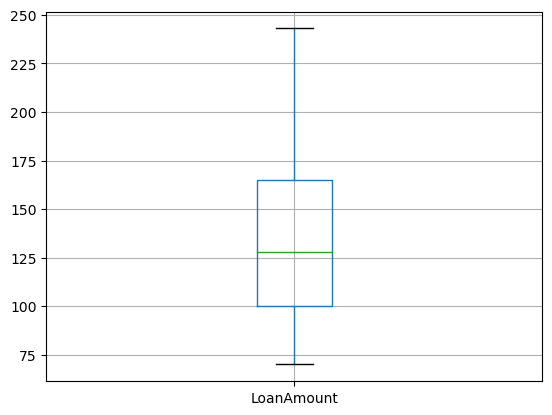

In [32]:
df.boxplot(column=['LoanAmount'])
plt.show()

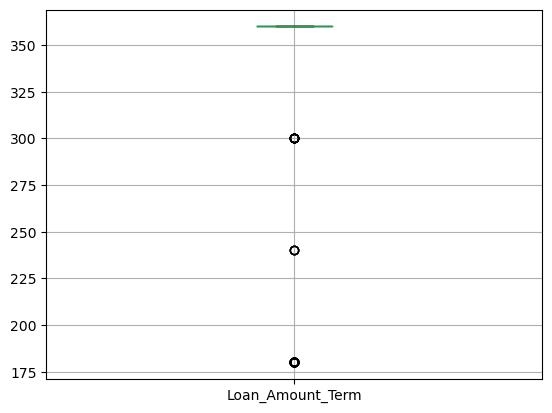

In [33]:
df.boxplot(column=['Loan_Amount_Term'])
plt.show()

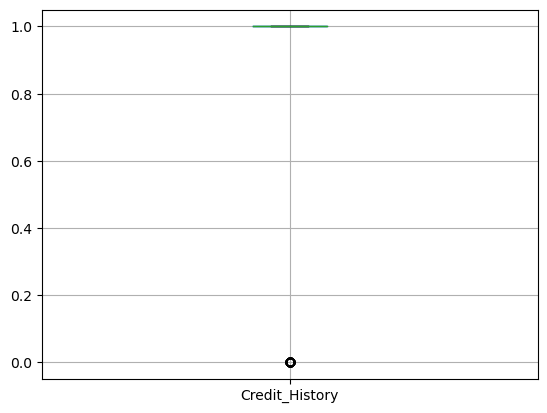

In [34]:
df.boxplot(column=['Credit_History'])
plt.show()

# Exploratory Data Analysis(EDA)


### data description

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4641.638436,1321.558502,137.439739,341.530945,0.855049
std,2389.403669,1406.990420,50.026832,52.806410,0.352339
min,2165.000000,0.000000,70.000000,180.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,9963.000000,4000.000000,243.000000,360.000000,1.000000


### Data Visualization

### Univariate Analysis

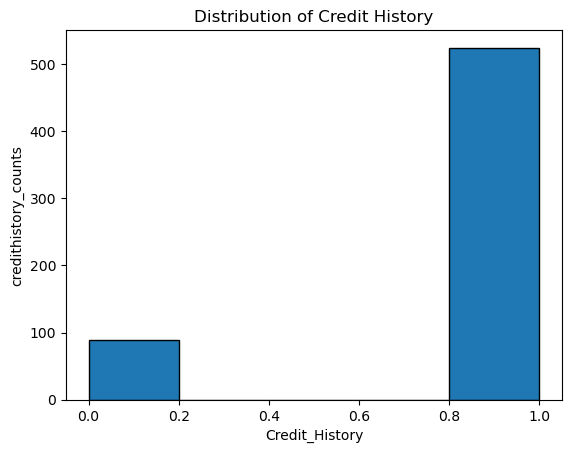

In [39]:
plt.hist(data=df,x='Credit_History', bins=5, edgecolor='black')
plt.xlabel('Credit_History')
plt.ylabel('credithistory_counts')
plt.title('Distribution of Credit History')
plt.show()

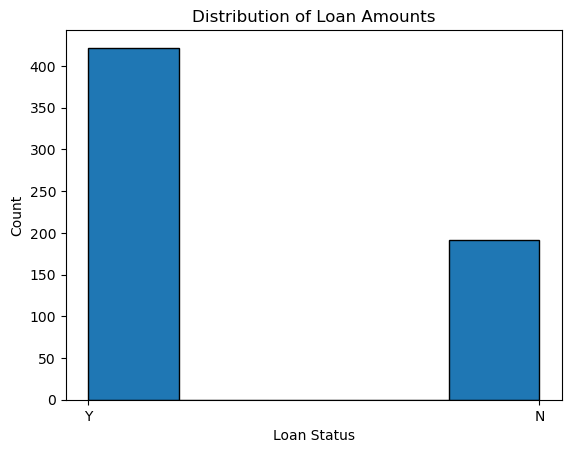

In [40]:
plt.hist(data=df,x='Loan_Status', bins=5, edgecolor='black')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts')
plt.show()

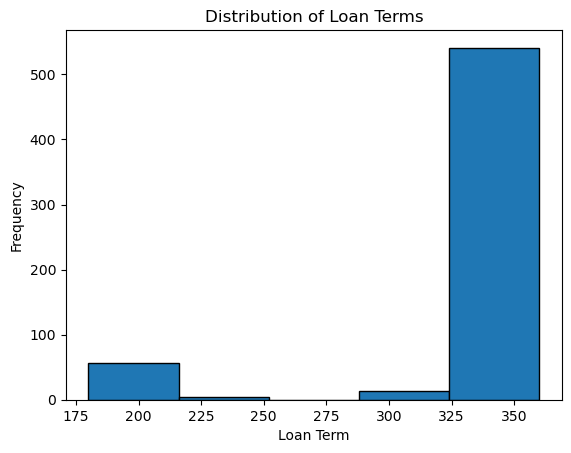

In [43]:
plt.hist(data=df,x='Loan_Amount_Term', bins=10, edgecolor='black')
plt.xlabel('Loan Term')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Terms')
plt.show()

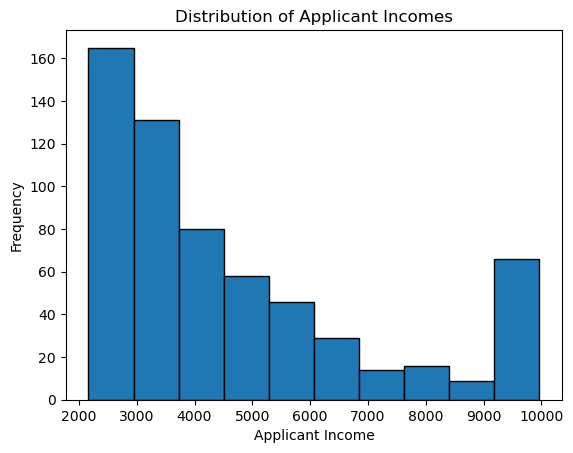

In [44]:
plt.hist(data=df,x='ApplicantIncome', bins=10, edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Incomes')
plt.show()

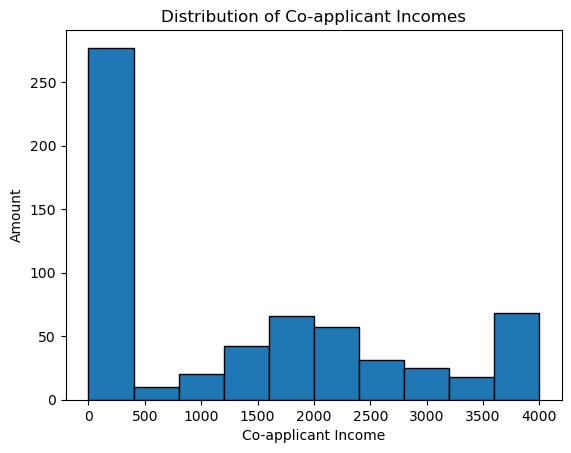

In [45]:
plt.hist(data=df,x='CoapplicantIncome', bins=10, edgecolor='black')
plt.xlabel('Co-applicant Income')
plt.ylabel('Amount')
plt.title('Distribution of Co-applicant Incomes')
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Semiurban'), Text(1, 0, 'Urban'), Text(2, 0, 'Rural')])

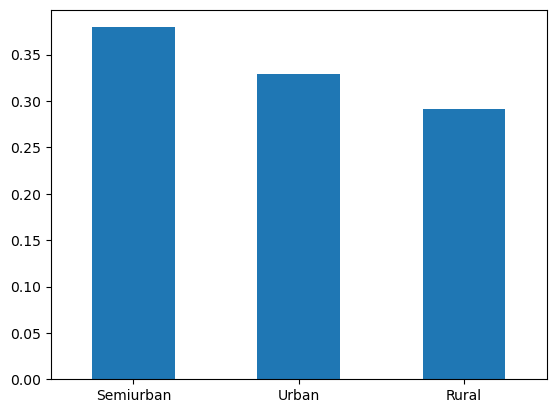

In [46]:
df['Property_Area'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

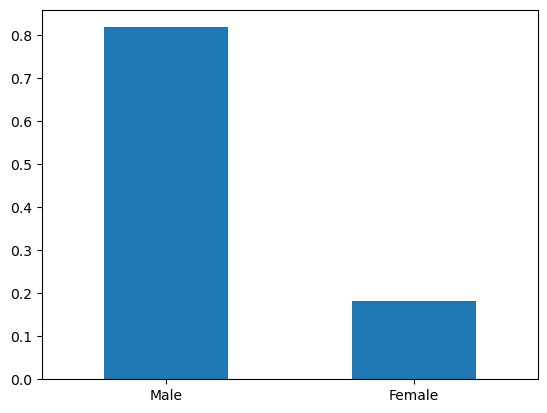

In [48]:
df['Gender'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

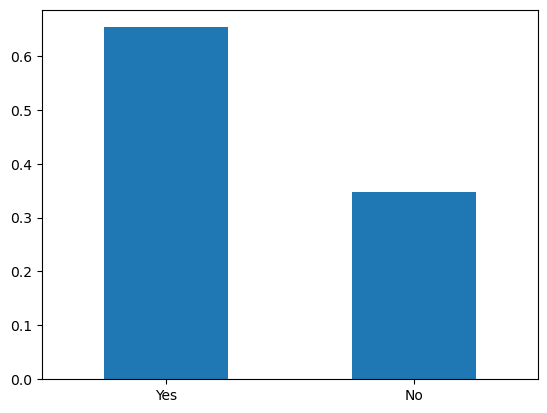

In [49]:
df['Married'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

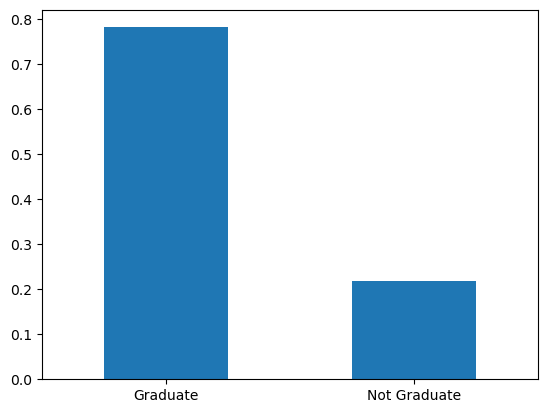

In [50]:
df['Education'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

In [65]:
df['Dependents'] = df['Dependents'].astype(int)

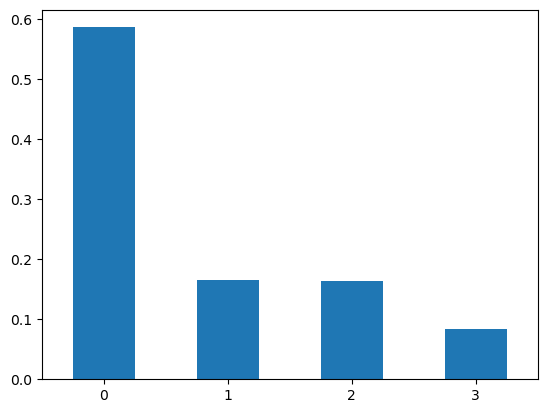

In [66]:
df['Dependents'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0);

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

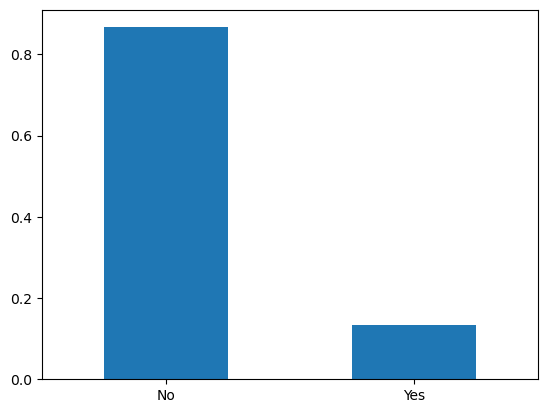

In [67]:
df['Self_Employed'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

### Bivariate Analysis

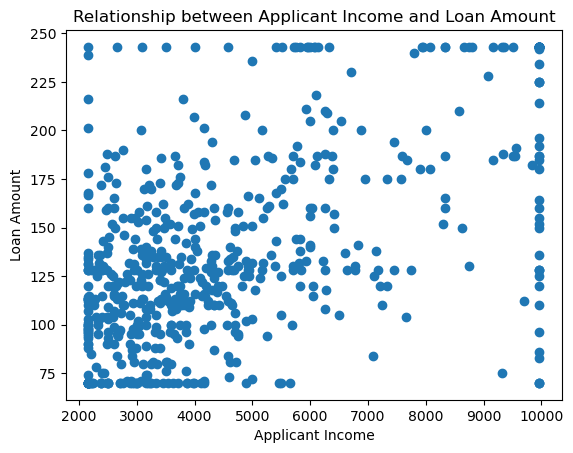

In [61]:
plt.scatter(data = df, x = 'ApplicantIncome', y = 'LoanAmount');
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Applicant Income and Loan Amount')
plt.show()

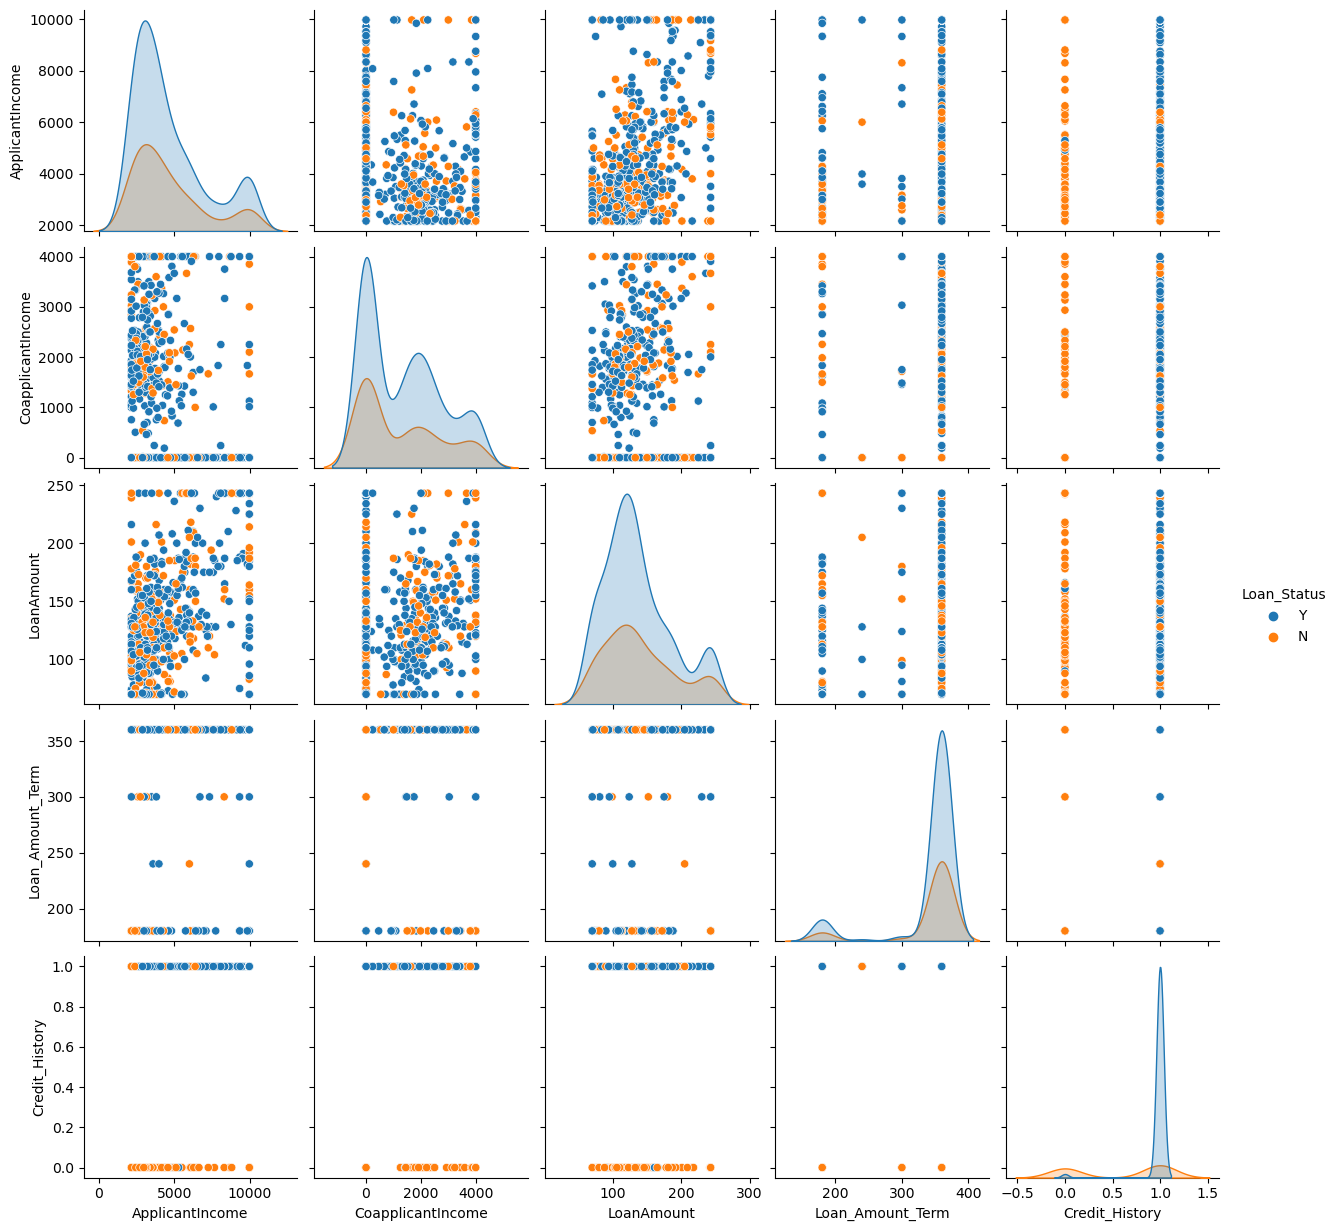

In [54]:
sns.pairplot(df, diag_kind= 'kde', hue = 'Loan_Status')

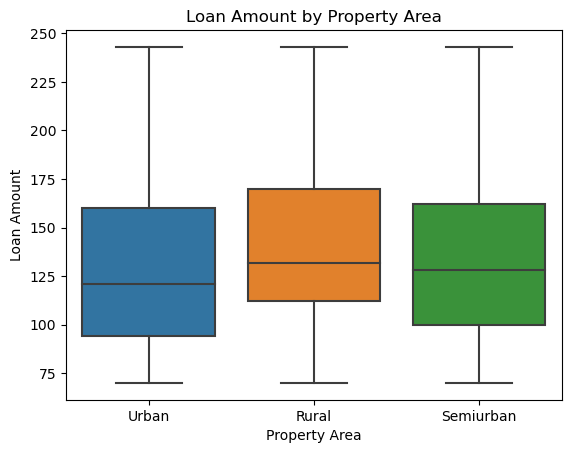

In [59]:
sns.boxplot(data=df, x='Property_Area', y='LoanAmount')

plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Property Area')

plt.show()


In [47]:
cross_tab = pd.crosstab(df['Education'], df['Loan_Status'])
print(cross_tab)


Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


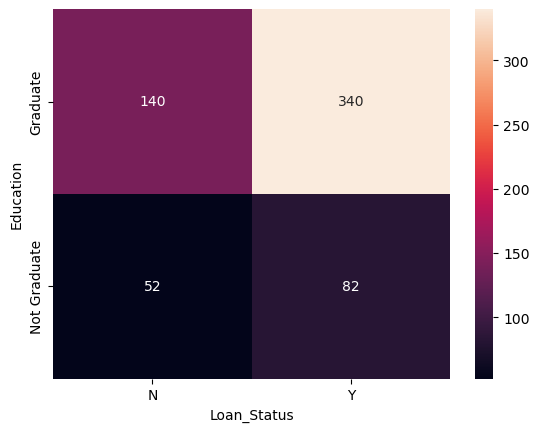

In [48]:
sns.heatmap(pd.crosstab(df.Education, df.Loan_Status), annot=True, fmt='d');

In [49]:
cross_tab = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
print(cross_tab)


Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


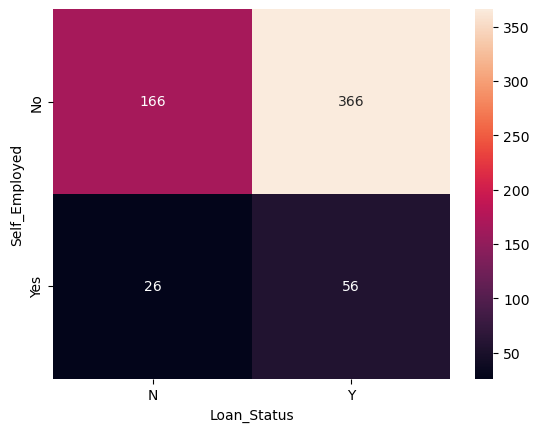

In [50]:
sns.heatmap(pd.crosstab(df.Self_Employed, df.Loan_Status), annot=True, fmt='d');

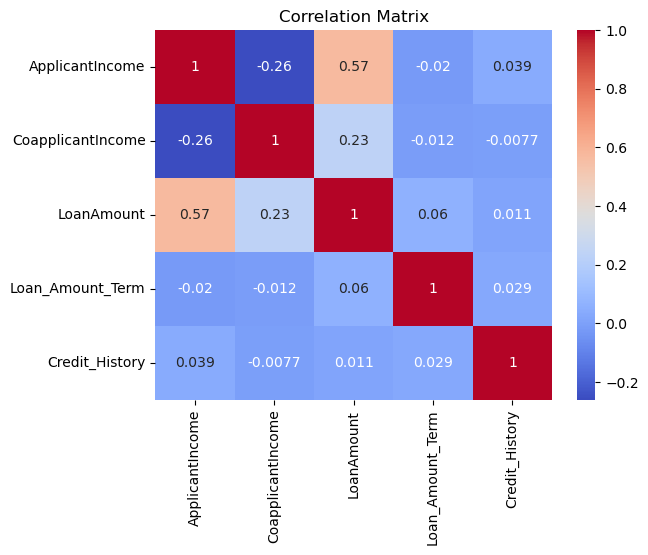

In [51]:

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

correlation_matrix = df[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Modeling

In [52]:
# Here we will remove the LoanID variable that will not be used
df = df.drop('Loan_ID', axis = 1)


In [53]:
#Separating into features variables and target variable.
X = df.drop('Loan_Status', axis = 1)


In [54]:
X = X.values


In [55]:
y = df['Loan_Status']


In [56]:
ros = RandomOverSampler(random_state=0)


In [57]:
X, y = ros.fit_resample(X, y)


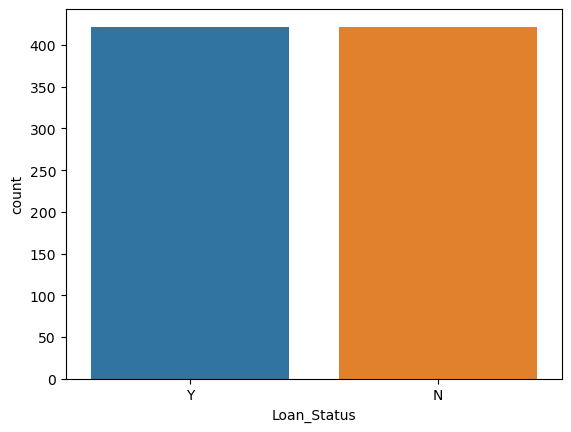

In [58]:
ax = sns.countplot(x=y)


In [59]:
# Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables
label_encoder_Gender = LabelEncoder()
label_encoder_Married = LabelEncoder()
label_encoder_Dependents = LabelEncoder()
label_encoder_Education = LabelEncoder()
label_encoder_Self_Employed = LabelEncoder()
label_encoder_Property_Area = LabelEncoder()
label_encoder_Loan_Status = LabelEncoder()

In [60]:
# Convert columns to a consistent data type
X[:, 0] = X[:, 0].astype(str)  # Convert column 0 to string
X[:, 1] = X[:, 1].astype(str)  # Convert column 1 to string
X[:, 2] = X[:, 2].astype(str)  # Convert column 2 to string
X[:, 3] = X[:, 3].astype(str)  # Convert column 3 to string
X[:, 4] = X[:, 4].astype(str)  # Convert column 4 to string
X[:, 10] = X[:, 10].astype(str)  # Convert column 10 to string

In [61]:
X[:,0] = label_encoder_Gender.fit_transform(X[:,0])
X[:,1] = label_encoder_Married.fit_transform(X[:,1])
X[:,2] = label_encoder_Dependents.fit_transform(X[:,2])
X[:,3] = label_encoder_Education.fit_transform(X[:,3])
X[:,4] = label_encoder_Self_Employed.fit_transform(X[:,4])
X[:,10] = label_encoder_Property_Area.fit_transform(X[:,10])
y = label_encoder_Loan_Status.fit_transform(y)

In [62]:
#StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [63]:
#Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)


In [64]:
X_train.shape, y_train.shape


((590, 11), (590,))

In [65]:
X_test.shape, y_test.shape


((254, 11), (254,))


# naive_bayes (Model 1)

In [66]:
# Create an instance of the Naive Bayes classifier
naive_bayes = GaussianNB()
# Train the classifier
naive_bayes.fit(X_train, y_train)
# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)


In [67]:


# Generate the classification report
classification_naive_bayes = classification_report(y_test, y_pred)

print(classification_naive_bayes)



              precision    recall  f1-score   support

           0       0.94      0.40      0.56       127
           1       0.62      0.98      0.76       127

    accuracy                           0.69       254
   macro avg       0.78      0.69      0.66       254
weighted avg       0.78      0.69      0.66       254



In [68]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6889763779527559


In [69]:
print("Predicted labels:", y_pred)

Predicted labels: [0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1]


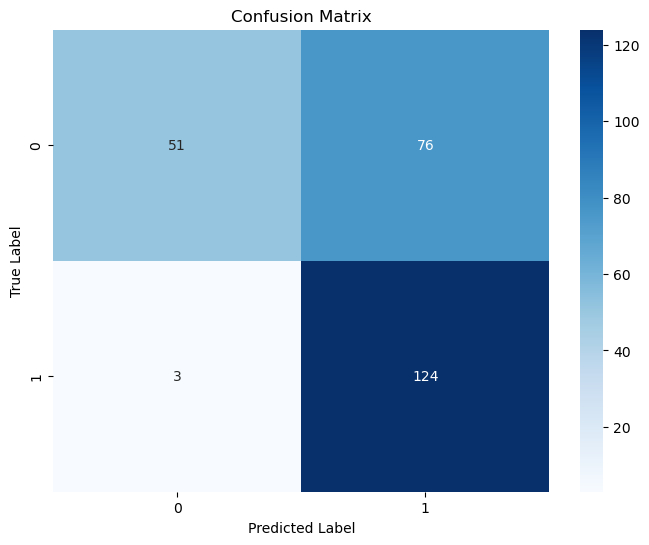

In [70]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique class labels
classes = np.unique(y_test)

# Create a heatmap using the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# DecisionTree (model 2)

In [71]:

# Create an instance of the Decision Tree classifier
decision_tree = DecisionTreeClassifier()


# Train the classifier
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)


In [72]:

# Generate the classification report
classification_tree = classification_report(y_test, y_pred)
print(classification_tree)

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       127
           1       0.84      0.72      0.78       127

    accuracy                           0.79       254
   macro avg       0.80      0.79      0.79       254
weighted avg       0.80      0.79      0.79       254



In [73]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7913385826771654


In [74]:
print("Predicted labels:", y_pred)

Predicted labels: [0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1
 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0
 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0
 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1]


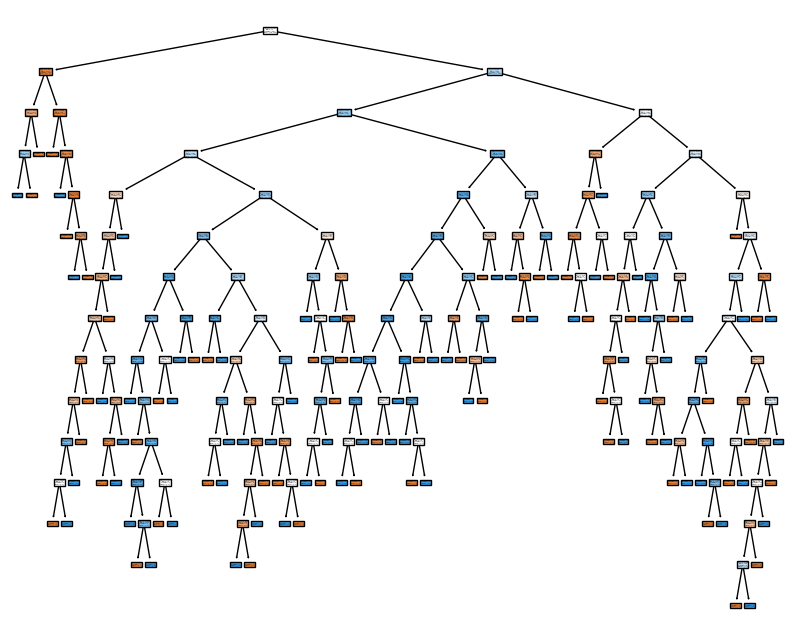

In [75]:

# Create an instance of the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier
decision_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, filled=True)
plt.show()

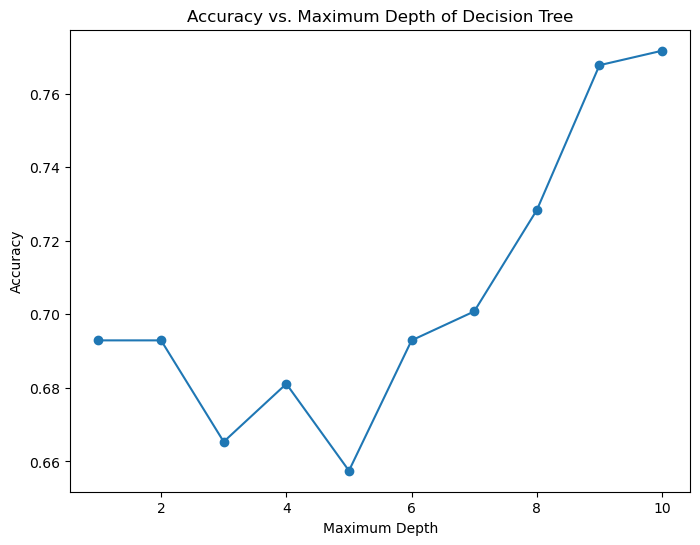

In [76]:
# Vary the maximum depth of the decision tree
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = []

# Train decision trees with different maximum depths
for depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Create a line plot of accuracy vs. maximum depth
plt.figure(figsize=(8, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Depth of Decision Tree')
plt.show()

# Gradient Boosting (model 3)

In [77]:
# Create an instance of the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Train the classifier
gradient_boosting.fit(X_train, y_train)


GradientBoostingClassifier()

In [78]:
# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

In [79]:
# Generate the classification report
classification_gradient_boosting = classification_report(y_test, y_pred)
print(classification_gradient_boosting)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       127
           1       0.78      0.85      0.81       127

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.81      0.80      0.80       254



In [80]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8031496062992126


In [81]:
print("Predicted labels:", y_pred)

Predicted labels: [0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1
 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1
 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1]


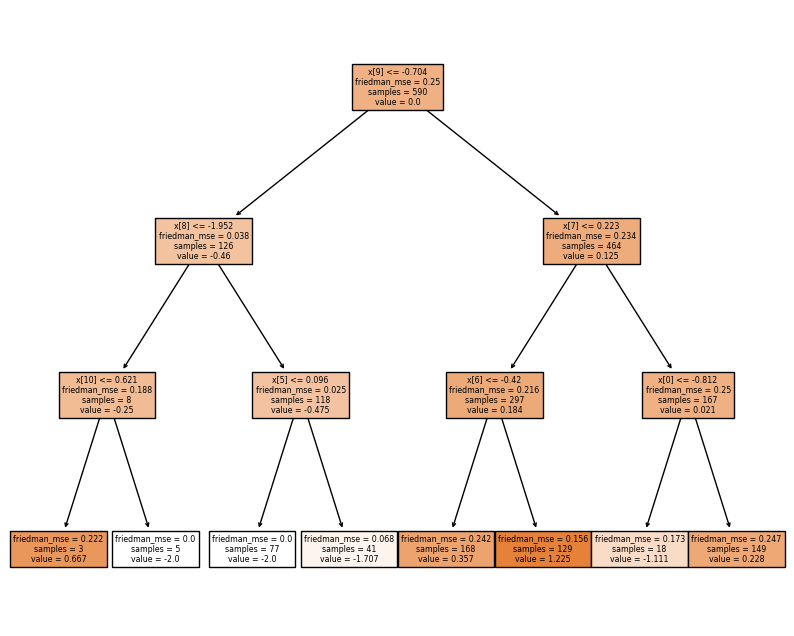

In [82]:
# Create an instance of the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Train the classifier
gradient_boosting.fit(X_train, y_train)

# Get the first tree from the ensemble
first_tree = gradient_boosting.estimators_[0, 0]

# Plot the first tree
plt.figure(figsize=(10, 8))
plot_tree(first_tree, filled=True)
plt.show()

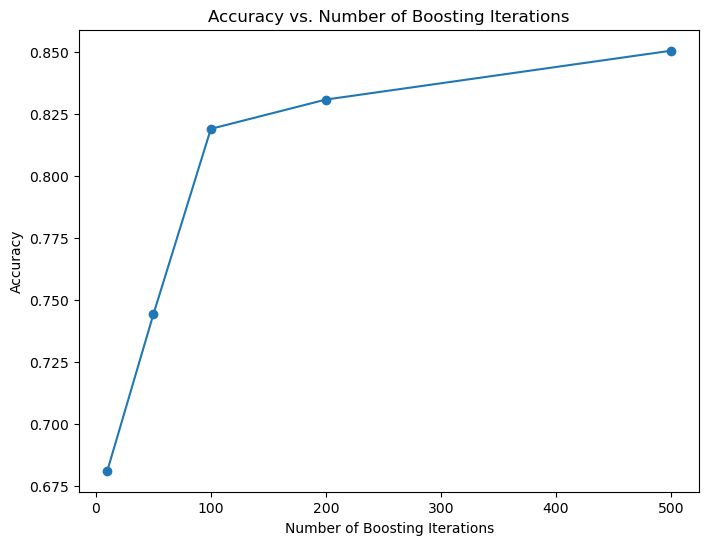

In [83]:
# Create an instance of the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Train the classifier with different numbers of boosting iterations
iterations = [10, 50, 100, 200, 500]
accuracies = []
for n_iter in iterations:
    gradient_boosting.n_estimators = n_iter
    gradient_boosting.fit(X_train, y_train)
    y_pred = gradient_boosting.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Create a line plot of accuracy vs. number of boosting iterations
plt.figure(figsize=(8, 6))
plt.plot(iterations, accuracies, marker='o')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Boosting Iterations')
plt.show()

# Random Forest ,the best (model 4)

In [84]:
# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the classifier
random_forest.fit(X_train, y_train)







RandomForestClassifier()

In [85]:
# Make predictions on the test set
y_pred = random_forest.predict(X_test)


In [86]:
# Generate the classification report
classification_random_forest = classification_report(y_test, y_pred)
print(classification_random_forest)


              precision    recall  f1-score   support

           0       0.85      0.88      0.87       127
           1       0.88      0.85      0.86       127

    accuracy                           0.87       254
   macro avg       0.87      0.87      0.87       254
weighted avg       0.87      0.87      0.87       254



In [87]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8661417322834646


In [88]:
print("Predicted labels:", y_pred)

Predicted labels: [0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0
 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0
 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1]


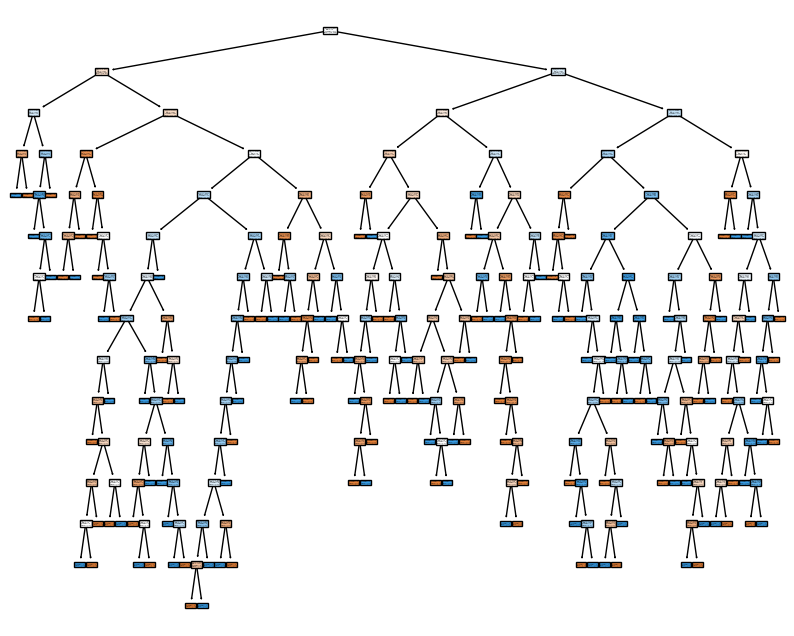

In [89]:
# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the classifier
random_forest.fit(X_train, y_train)

# Get the first tree from the forest
first_tree = random_forest.estimators_[0]

# Plot the first tree
plt.figure(figsize=(10, 8))
plot_tree(first_tree, filled=True)
plt.show()

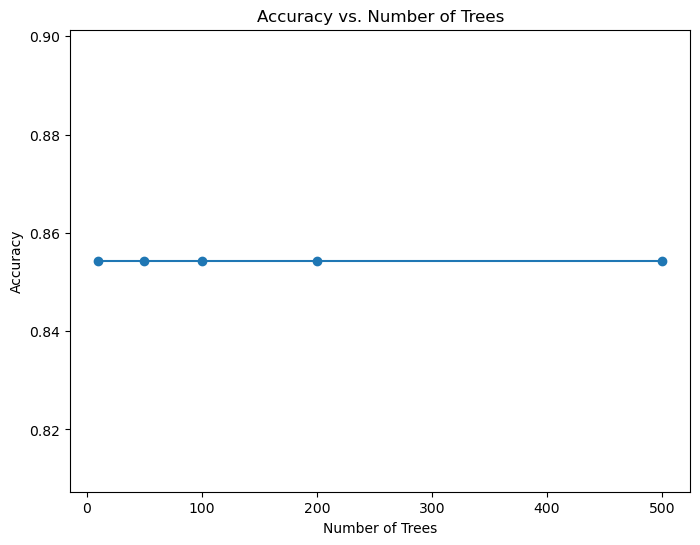

In [90]:


# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the classifier
random_forest.fit(X_train, y_train)

# Get the accuracy for different numbers of trees
trees = [10, 50, 100, 200, 500]
accuracies = []
for n_trees in trees:
    random_forest.n_estimators = n_trees
    y_pred = random_forest.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Create a line plot of accuracy vs. number of trees
plt.figure(figsize=(8, 6))
plt.plot(trees, accuracies, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.show()